# Matplotlib basics - part 1.

This notebook stands for the first part of introduction to and presentation of Matplotlib - absolute fundamentals of plotting in Python.

### Matplotlib features

Matplotlib enables one to create various types of visualizations. One can create static plots and animations.
Output can be adjusted in many ways and there is a great number of parameters to set that can make
the plot fit the purpose.

### Fundamentals

We import it as follows:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

We'll also import _numpy_.

In [2]:
import numpy as np

The _pyplot_ is almost always used when working with matplotlib. It's purpose will be become more clear later,
for now it's enough to say that it enables one to create a plot and is almost always imported when using in notebooks
like this.

Let's turn on inline plotting:

In [3]:
%matplotlib inline

Inline plotting makes interactive working with Matplotlib more convenient - commands in cells below the cell
that outputs a plot will not affect the plot.

Basically, a Matplotlib plot is a _**Figure**_ class instance. One matplotlib figure can contain
several _**axes**_. Each axes usually contains one plot. Each Axes usually includes some **Axis** objects
(two in case of 2D and three in case of 3D; be aware of the difference between _axes_ and _axis_).

The simplest way of creating a figure is via _pyplot.subplots()_:

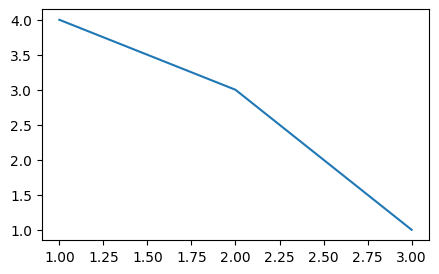

In [4]:
fig, ax = plt.subplots(figsize=(5,3))  # a figure with one axes
ax.plot([1,2,3], [4, 3, 1])  # plot method plots some data on the  figure's axes
plt.show()  # sometimes it's necessary to make the plot show

In [5]:
type(fig)

matplotlib.figure.Figure

In [6]:
type(ax)

matplotlib.axes._axes.Axes

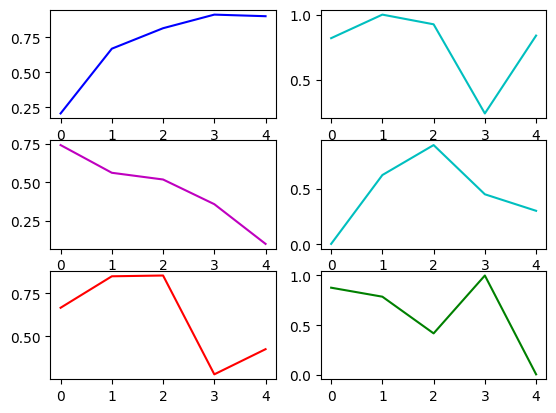

In [7]:
fig, axes = plt.subplots(3, 2)  # a figure with a grid of axes
                                # (3 rows, 2 columns)
for ax in axes.ravel():  # axes is an array of shape (3,2)
    ax.plot(np.random.random(5), c=np.random.choice(['c', 'b', 'g', 'm', 'r']))

In [8]:
type(axes)

numpy.ndarray

### Parts of a figure and two ways of using Matplotlib

We'll show two approaches of coding in Matplotlib:

- **OOP (explicit) style**
- **pyplot (implicit) style**

The OOP style makes use of methods of Figure, Axes and other classes objects in order to create a desired
plot. The pyplot style uses MATLAB-like functions that are stored in the _pyplot_ subpackage.
However, the pyplot subpackage is used to create a figure in both cases.

In [9]:
increasing_series = np.array([1,2,5,7,8])
decreasing_series = np.array([5,2,1,0,-1])
random_series = np.random.random(5)

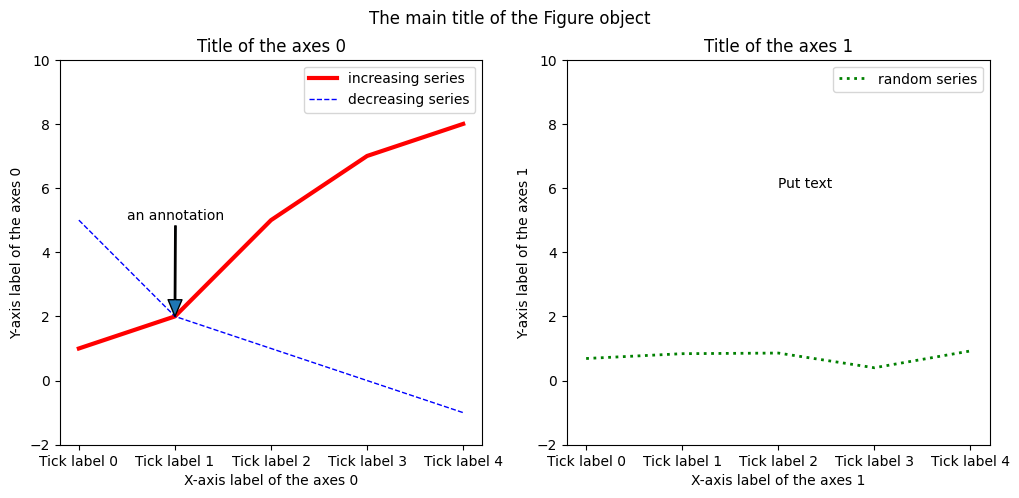

In [10]:
# OOP style

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("The main title of the Figure object")

axes[0].plot(increasing_series, c='r', label="increasing series", linewidth=3)

dec_ser_line = axes[0].plot(decreasing_series)
dec_ser_line[0].set_label("decreasing series")
dec_ser_line[0].set_color('b')
dec_ser_line[0].set_linestyle('--')
dec_ser_line[0].set_linewidth(1)

axes[0].annotate('an annotation', xy=(1, 2), xytext=(0.5, 5),
                arrowprops={"width": 1, "headwidth": 10})

axes[1].plot(random_series, c='g', label="random series", linewidth=2, linestyle=":")

axes[1].text(2, 6, "Put text")

for i, ax in enumerate(axes):
    ax.set_title(f"Title of the axes {i}")
    ax.set_xlabel(f"X-axis label of the axes {i}")
    ax.set_ylabel(f"Y-axis label of the axes {i}")
    ax.legend()
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels([f"Tick label {i}" for i in range(5)])
    ax.set_ylim(-2, 10)

In [11]:
print(type(dec_ser_line))
print(dec_ser_line)

<class 'list'>


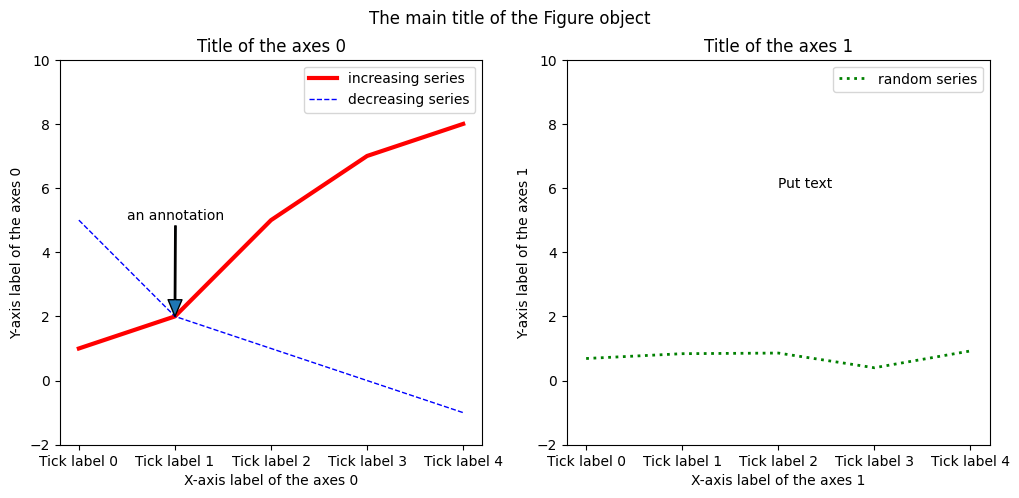

In [12]:
# pyplot style

plt.figure(figsize=(12,5))
plt.suptitle("The main title of the Figure object")

def set_axes(i):
    plt.subplot(1,2,i+1)
    plt.title(f"Title of the axes {i}")
    plt.xlabel(f"X-axis label of the axes {i}")
    plt.ylabel(f"Y-axis label of the axes {i}")
    plt.xticks(np.arange(5), labels=[f"Tick label {i}" for i in range(5)])
    plt.ylim(-2, 10)

set_axes(0)
plt.plot(increasing_series, c='r', label="increasing series", linewidth=3)
plt.plot(decreasing_series, c='b', label="decreasing series", linewidth=1, linestyle="--")
plt.legend()
plt.annotate('an annotation', xy=(1, 2), xytext=(0.5, 5),
             arrowprops={"width": 1, "headwidth": 10})

set_axes(1)
plt.plot(random_series, c='g', label="random series", linewidth=2, linestyle=":")
plt.legend()
plt.text(2, 6, "Put text")

plt.show()

In this notebook, from this point, **we will stick to the OOP style**.

### Plot types

_plot_ - plot y versus x

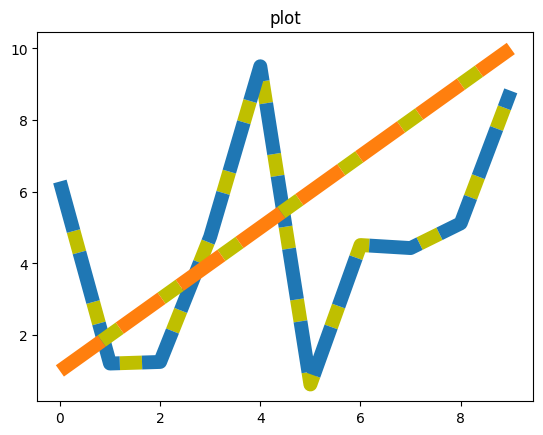

In [13]:
x = np.arange(10)
y1 = np.random.rand(10) * 10
y2 = np.arange(10) + 1
y = np.stack((y1, y2))

fig, ax = plt.subplots()
ax.set_title("plot")

plot = ax.plot(
    x,
    y.transpose(),  # transposition is necessary
    linewidth=10,
    linestyle='--',
    gapcolor='y',
)

In [14]:
plot

_scatterplot_ - a set of (x,y) points

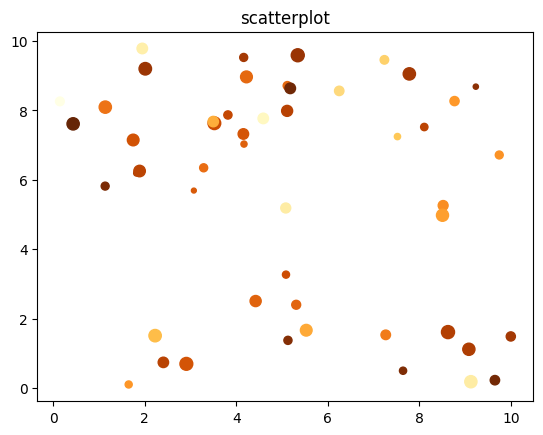

In [15]:
n_points= 50
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)

sizes = np.random.uniform(10, 90, n_points)
colors = np.random.uniform(1, 9, n_points)

fig, ax = plt.subplots()
ax.set_title("scatterplot")

plot = ax.scatter(x, y, c=colors, s=sizes, cmap="YlOrBr", norm='log')

In [16]:
plot

_barplot_ - quantities as bars of varying height

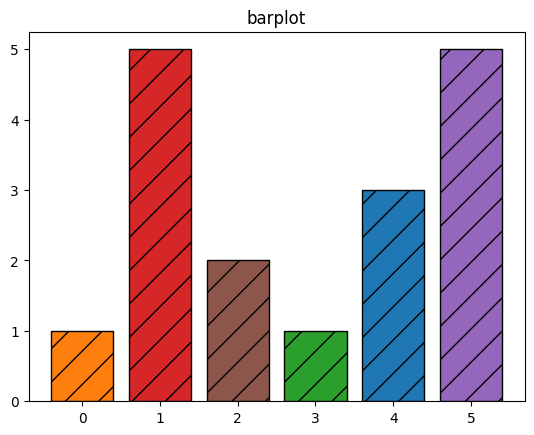

In [17]:
x = np.arange(6)
vals = [1, 5, 2, 1, 3, 5]

fig, ax = plt.subplots()
ax.set_title("barplot")

plot = ax.bar(
    x,
    vals,
    color=["tab:orange", "tab:red", "tab:brown", "tab:green", "tab:blue", "tab:purple"],
    edgecolor="black",
    hatch="/",
)

In [18]:
plot

<BarContainer object of 6 artists>

_Horizontal barplot_:

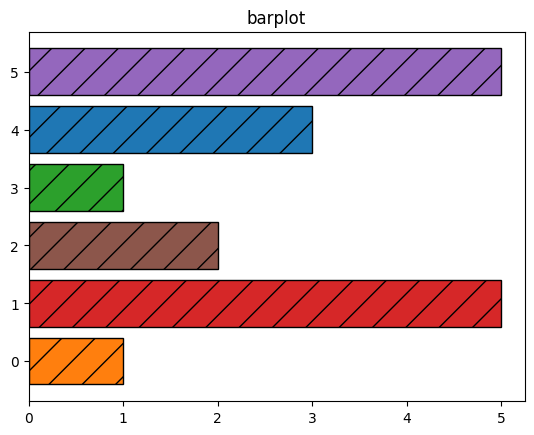

In [19]:
x = np.arange(6)
vals = [1, 5, 2, 1, 3, 5]

fig, ax = plt.subplots()
ax.set_title("barplot")

plot = ax.barh(
    x,
    vals,
    color=["tab:orange", "tab:red", "tab:brown", "tab:green", "tab:blue", "tab:purple"],
    edgecolor="black",
    hatch="/",
)

In [20]:
plot

<BarContainer object of 6 artists>

_Histogram_

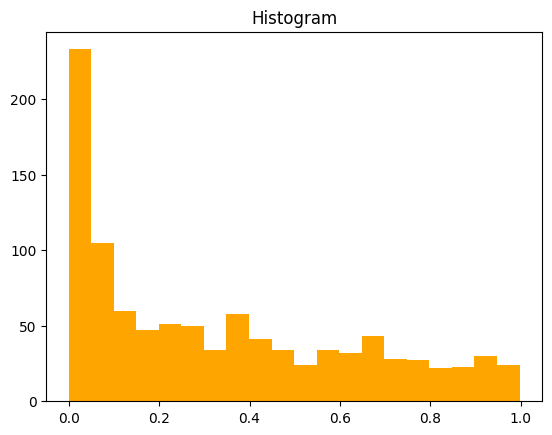

In [21]:
samples_from_beta = np.random.beta(0.5, 1, 1000)

fig, ax = plt.subplots()
ax.set_title("Histogram")

plot = ax.hist(
    samples_from_beta,
    bins=20,
    color='orange',
)

In [22]:
plot

(array([233., 105.,  60.,  47.,  51.,  50.,  34.,  58.,  41.,  34.,  24.,
         34.,  32.,  43.,  28.,  27.,  22.,  23.,  30.,  24.]),
 array([1.12909820e-06, 4.98486520e-02, 9.96961748e-02, 1.49543698e-01,
        1.99391221e-01, 2.49238743e-01, 2.99086266e-01, 3.48933789e-01,
        3.98781312e-01, 4.48628835e-01, 4.98476358e-01, 5.48323880e-01,
        5.98171403e-01, 6.48018926e-01, 6.97866449e-01, 7.47713972e-01,
        7.97561495e-01, 8.47409018e-01, 8.97256540e-01, 9.47104063e-01,
        9.96951586e-01]),
 <BarContainer object of 20 artists>)

Filled area

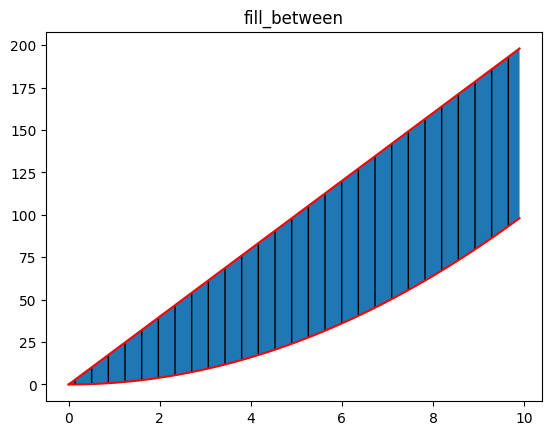

In [23]:
x = np.arange(0, 10, 0.1)
lower_border = np.power(x, 2)
upper_border = 20*x

fig, ax = plt.subplots()
ax.set_title("fill_between")
ax.plot(x, lower_border, c='r')
ax.plot(x, upper_border, c='r')

plot = ax.fill_between(
    x=x,
    y1=lower_border,
    y2=upper_border,
    hatch='|',
)

In [24]:
plot

2D array visualization (e.g. images)

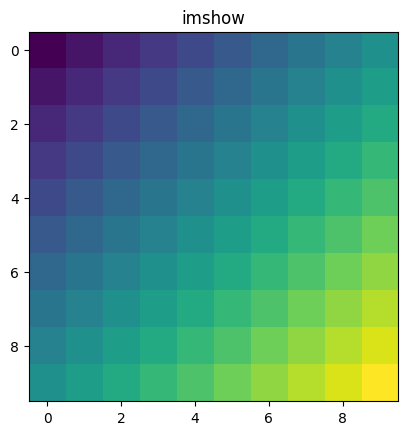

In [25]:
grid = np.add.outer(
    np.arange(10),
    np.arange(10)
)

fig, ax = plt.subplots()
ax.set_title("imshow")

plot = ax.imshow(
    grid
)

In [26]:
plot

_Pie chart_

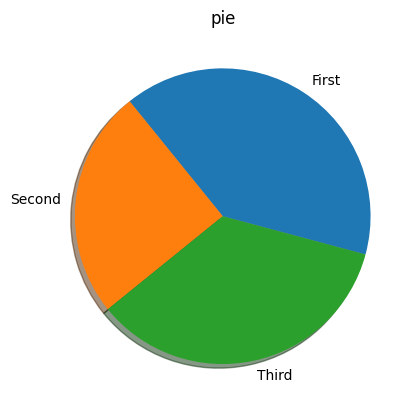

In [27]:
proportions = [4, 2.5, 3.5]

fig, ax = plt.subplots()
ax.set_title("pie")

plot = ax.pie(
    proportions,
    labels=["First", "Second", "Third"],
    shadow=True,
    startangle=-15
)

In [28]:
plot

([<matplotlib.patches.Wedge at 0x7616767111c0>,
 [Text(0.599102857989579, 0.922537677034775, 'First'),
  Text(-1.0939741083288377, 0.11498108673222909, 'Second'),
  Text(0.2287031355305756, -1.0759623022199631, 'Third')])

_Contour plot_

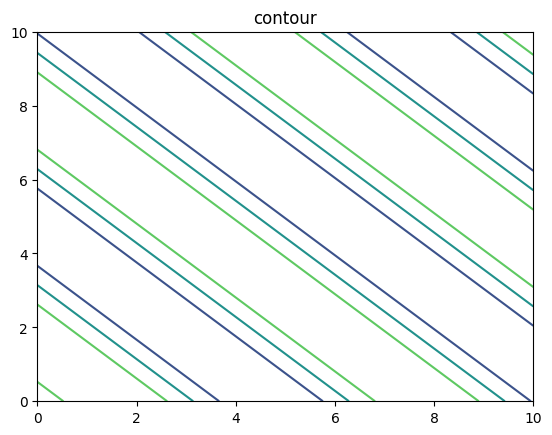

In [29]:
X, Y = np.meshgrid(np.linspace(0, 10), np.linspace(0, 10))
Z = np.sin(X + Y)

fig, ax = plt.subplots()
ax.set_title("contour")

plot = ax.contour(X, Y, Z,
          levels=np.linspace(np.min(Z), np.max(Z), 5))

In [30]:
plot

...and others.

See the second part in the notebook _matplotlib-basics-part-2.ipynb_.